In [ ]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('../data/sample_climate_data.csv')
df['date'] = pd.to_datetime(df['date'])


,date,location,precipitation_mm,temperature_c
0,2023-07-01,Farm_A,12.3,30.1
1,2023-07-02,Farm_A,8.5,29.4
2,2023-07-03,Farm_A,0.0,28.9
3,2023-07-04,Farm_A,22.7,31.2
4,2023-07-05,Farm_A,35.0,33.0


Initial exploratory work 

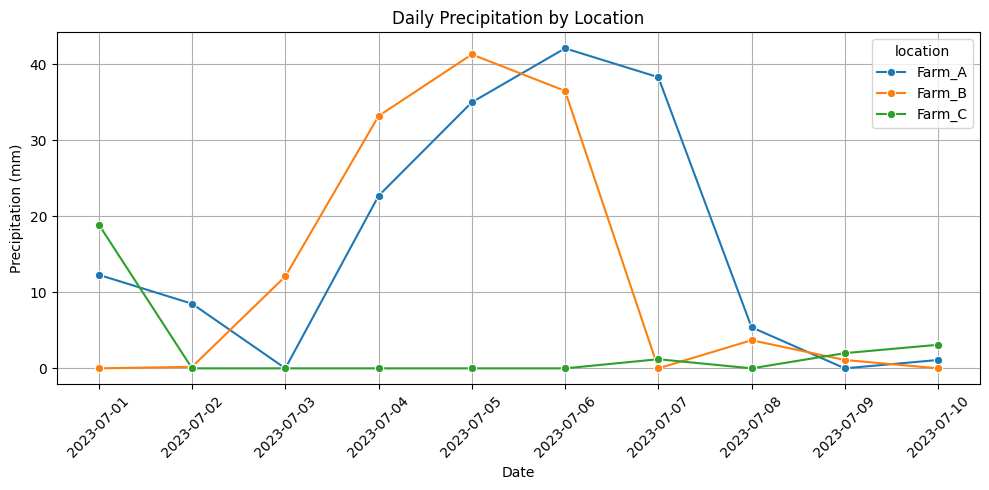

In [51]:
## Create precipitation plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='precipitation_mm', hue='location', marker='o')
plt.title('Daily Precipitation by Location')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


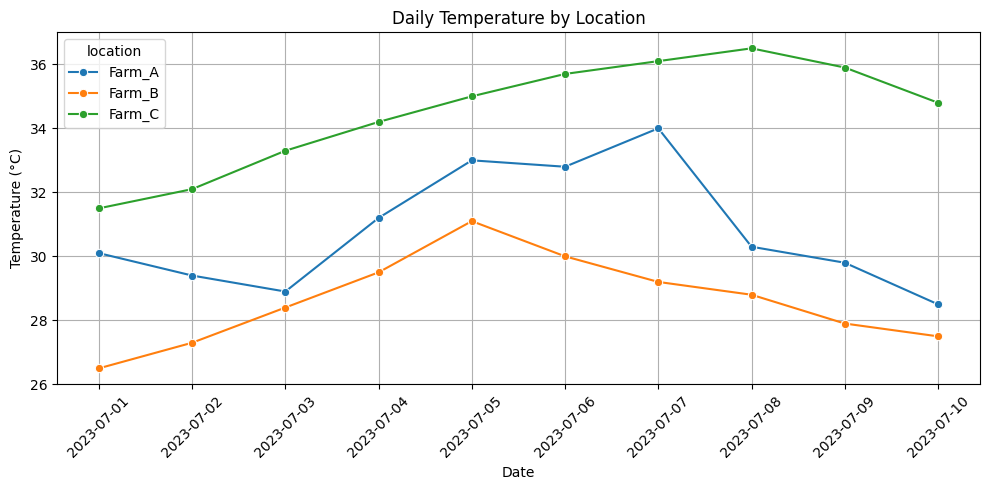

In [52]:
## Create temperature plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='temperature_c', hue='location', marker='o')
plt.title('Daily Temperature by Location')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Create a new column for heavy rain
df['heavy_rain'] = df['precipitation_mm'] > 30
df[df['heavy_rain']].sort_values(by='location')

,date,location,precipitation_mm,temperature_c,heavy_rain,temperature_ma_3d,precipitation_ma_3d,above_threshold,triggered
4,2023-07-05,Farm_A,35.0,33.0,True,31.033333,19.233333,True,True
5,2023-07-06,Farm_A,42.1,32.8,True,32.333333,33.266667,True,True
6,2023-07-07,Farm_A,38.3,34.0,True,33.266667,38.466667,True,True
13,2023-07-04,Farm_B,33.2,29.5,True,28.400000,15.166667,False,False
14,2023-07-05,Farm_B,41.3,31.1,True,29.666667,28.866667,False,False
15,2023-07-06,Farm_B,36.5,30.0,True,30.200000,37.000000,True,False


Rolling Averages 

In [54]:
# Calculate 7-day moving averages for temperature and precipitation
df['temperature_ma_3d'] = df['temperature_c'].rolling(window=3).mean()
df['precipitation_ma_3d'] = df['precipitation_mm'].rolling(window=3).mean()

# Display the updated dataframe
df.head()

,date,location,precipitation_mm,temperature_c,heavy_rain,temperature_ma_3d,precipitation_ma_3d,above_threshold,triggered
0,2023-07-01,Farm_A,12.3,30.1,False,NaN,NaN,False,False
1,2023-07-02,Farm_A,8.5,29.4,False,NaN,NaN,False,False
2,2023-07-03,Farm_A,0.0,28.9,False,29.466667,6.933333,False,False
3,2023-07-04,Farm_A,22.7,31.2,False,29.833333,10.400000,False,False
4,2023-07-05,Farm_A,35.0,33.0,True,31.033333,19.233333,True,True


Plot rolling averages for precipitation

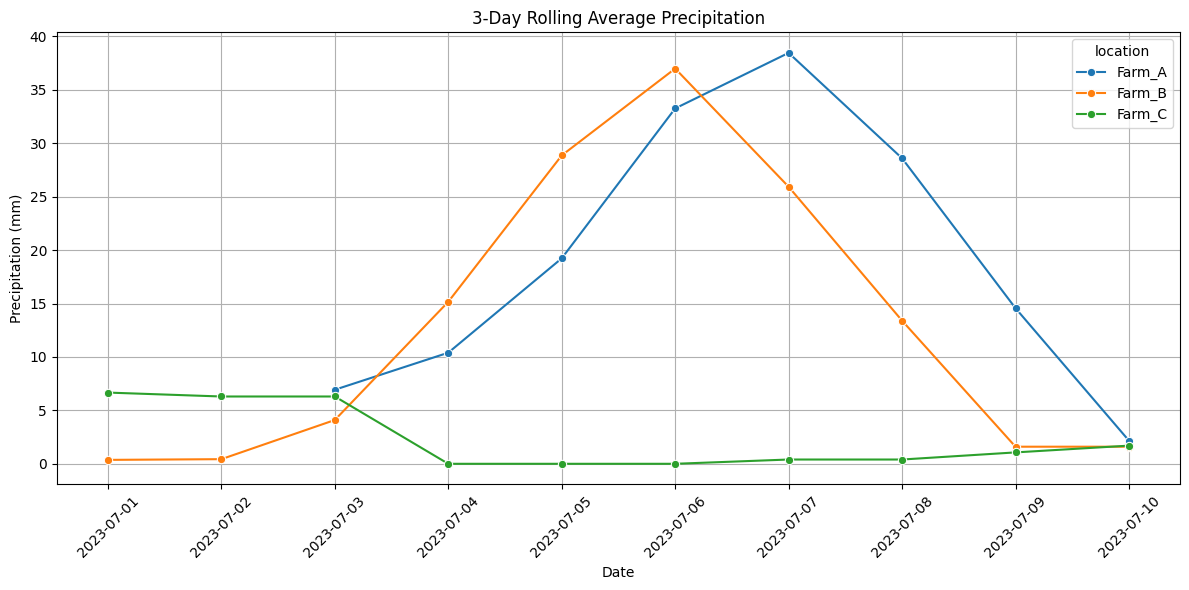

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='precipitation_ma_3d', hue='location', marker='o')
plt.title('3-Day Rolling Average Precipitation')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plot rolling averages for temperature

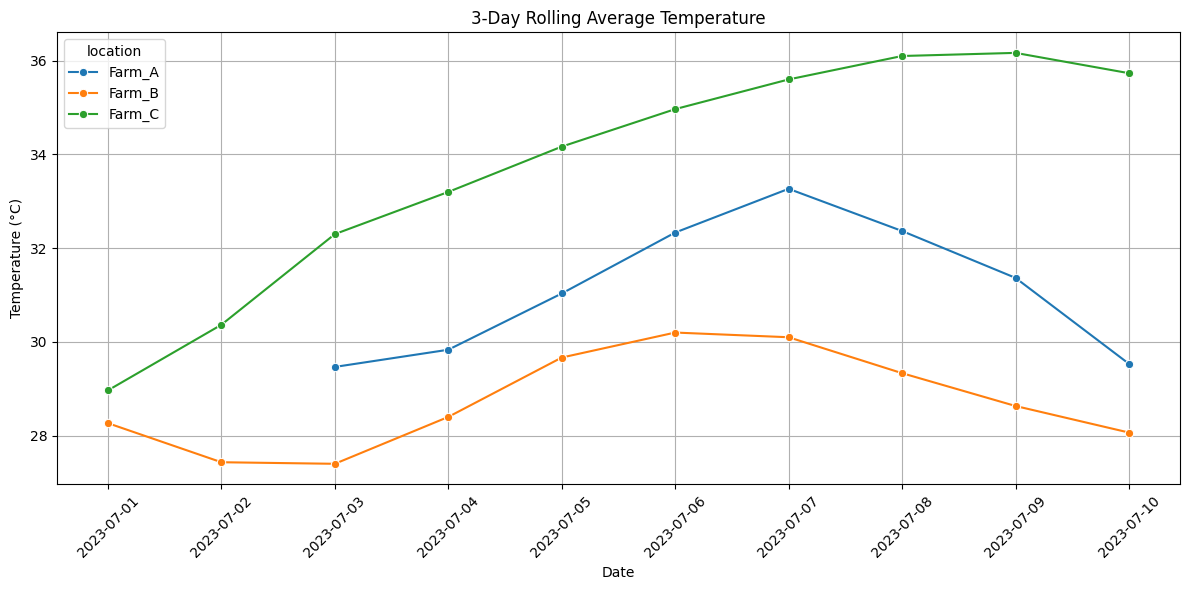

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='temperature_ma_3d', hue='location', marker='o')
plt.title('3-Day Rolling Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# Filter the dataframe for days with rolling temperatures over 30
rolling_temp_over_30 = df[df['temperature_ma_3d'] > 30]




In [58]:
# Count the number of days for each location
days_over_30_temp = rolling_temp_over_30['location'].value_counts()


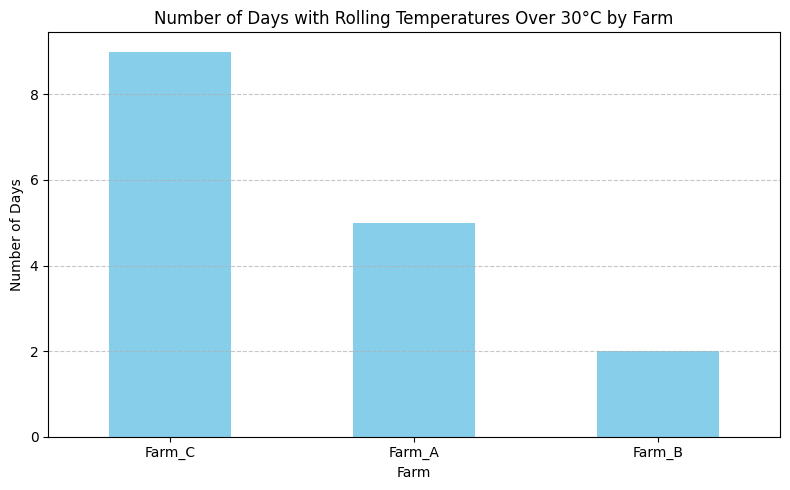

In [59]:
# Plot the bar graph
plt.figure(figsize=(8, 5))
days_over_30_temp.plot(kind='bar', color='skyblue')
plt.title('Number of Days with Rolling Temperatures Over 30°C by Farm')
plt.ylabel('Number of Days')
plt.xlabel('Farm')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
# Filter the dataframe for days with rolling precipitation over 30
rolling_precip_over_30 = df[df['precipitation_ma_3d'] > 30]


In [61]:
# Filter the dataframe for days with rolling precipitation over 30
days_over_30_precip = rolling_precip_over_30['location'].value_counts()


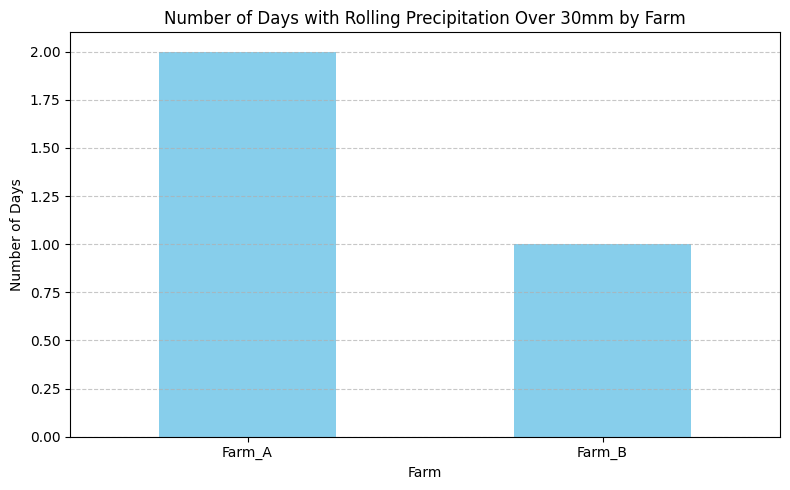

In [62]:
# Plot the bar graph
plt.figure(figsize=(8, 5))
days_over_30_precip.plot(kind='bar', color='skyblue')
plt.title('Number of Days with Rolling Precipitation Over 30mm by Farm')
plt.ylabel('Number of Days')
plt.xlabel('Farm')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

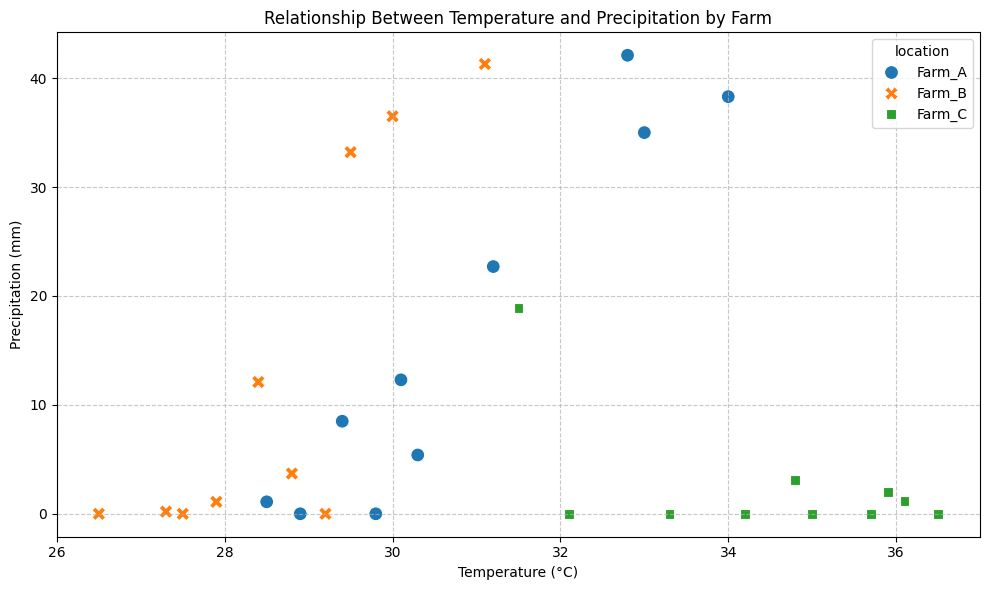

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature_c', y='precipitation_mm', hue='location', style='location', s=100)
plt.title('Relationship Between Temperature and Precipitation by Farm')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary of Climate Data Exploration

This exploratory analysis used synthetic climate data from three fictional farm locations — **Farm_A**, **Farm_B**, and **Farm_C** — to simulate parametric risk triggers based on temperature and precipitation trends.

---

### Key Findings: Temperature

- A **3-day rolling average** was used to smooth daily temperature fluctuations and simulate prolonged heat exposure.
- Days where the 3-day average temperature exceeded **30°C** were flagged as **heatwave conditions**.
- Farm_C had the **highest frequency** of heatwave days, suggesting greater vulnerability to sustained high temperatures.
- A heatwave risk map or payout trigger could be defined as:  
  _"If 3-day average temperature exceeds 30°C for 3+ days within a 10-day period."_

---

### Key Findings: Precipitation

- A 3-day rolling average was also applied to daily rainfall.
- Parametric rainfall trigger points were flagged when average rainfall exceeded **30mm**.
- Farm_A showed multiple instances of excessive rainfall in short periods — useful for simulating **flood or crop damage payout conditions**.


---

### Risk Correlation

- A scatterplot analysis between rolling rainfall and temperature showed no clear correlation

---

### Next Steps

- Formalize **parametric payout logic** using the flag and streak detection
- Use classification models to process **unstructured claim reports** and simulate automation of human decision-making
- Build a dashboard for stakeholder visualization using Streamlit

---

### Takeaway

This EDA lays the groundwork for modeling **data-driven climate risk triggers** using simple logic and rolling windows — directly aligned with how platforms like **Arbol** use objective environmental data to automate insurance claims and payouts.
